## Support Vector Machine
- 데이터의 분포 가정이 힘들 때(LDA 적용이 어려울 때), 아래의 데이터를 잘 나누려면?
  - boundary에 집중. margin을 최대화하는 boundary를 찾는 것
  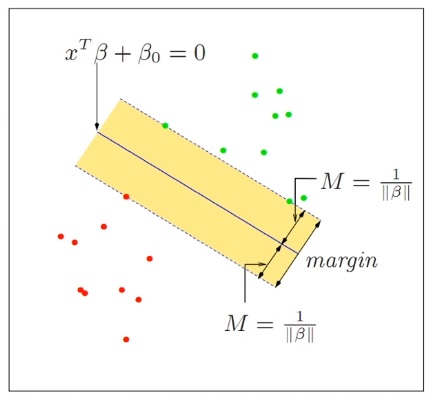
  - 명확히 구분되지 않는 경우 : 적당한 error를 허용/최소화하는 boundary 결정

- 종속 변수 데이터 형태에 따라 아래의 둘로 나뉜다.
  - **범주형 변수** : Support vector classifier(많이 쓰임)
  - **연속형 변수** : Support vector regression(SVR)
    - 회귀분석은 선을 하나 긋기에 모든 점들에 대해서 오차가 생김
    - SVR은 최대한의 margin을 설정하고, margin 밖에 있는 점에 대해서만 penalty를 부여함

- SVM, SVR의 핵심
  - **Model cost에 영향을 끼칠 점과 끼치지 않을 점을 margin을 통해 구분**
    - SVM : margin안에 포함되거나 반대방향으로 분류된 점들을 반영
    - SVR : margin 바깥에 위치한 점들을 반영
  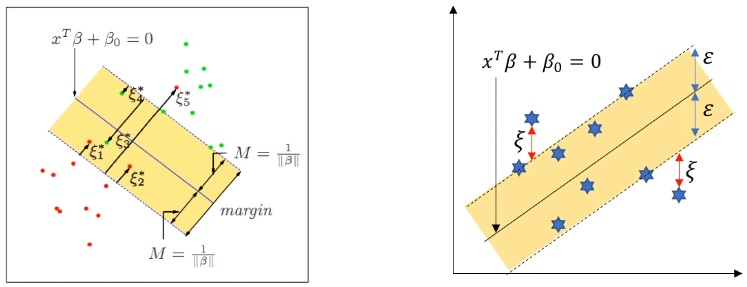

## SVM의 수학적 이해
- 아래의 데이터를 식을로 구분하는 방법?
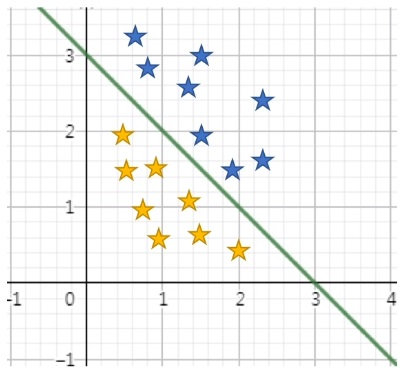
  - 파란점 : $-x+3>0$, 노란점 : $-x+3<0$
  

- **위의 개념을 확장**
  - $h_a(x)$를 decision boundary라 칭함
  - $h_a(x)=a_0+a^Tx=a_0+a_1x_1+...+a_px_p$
    - 여기서의 파란점 : $h_a(x)>0$, 노란점 : $h_a(x)<0$로 이해
    

- 이 때, $a^T$와 $a_0$을 조정하면 예측값이 바뀌게 됨
  - **$a^T,a_0$을 설정하는 과정이 claasification machine을 learning하는 과정**

### Lagrange multiplier(라그랑주 승수)
- 라그랑주 승수의 기본 아이디어
  - 최적화 문제(최소화/최대화 하는 값)를 풀 때, **$f(x,y)$를 최대화하는 동시에 $g(x,y)=c$로 한정하고 싶은 경우**
  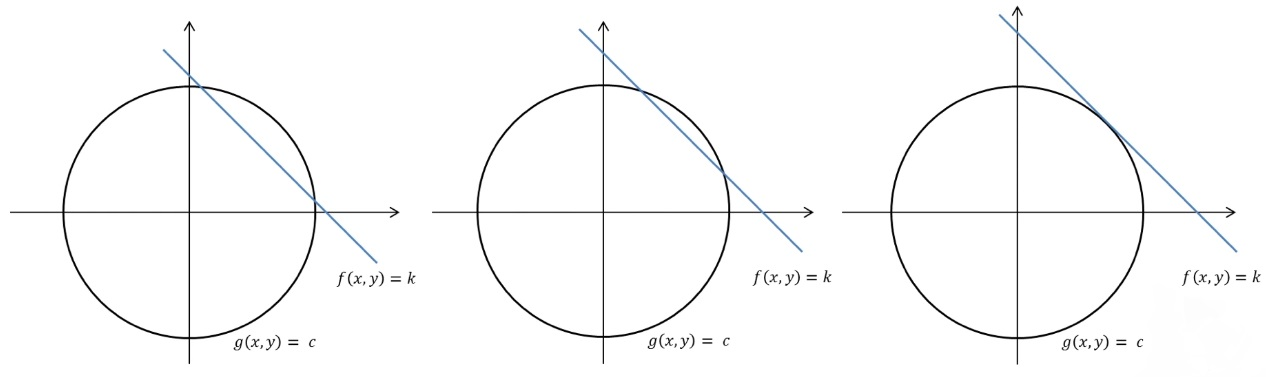
  - 위의 예시에 경우 $f(x,y)$는 원과 접할 때(오른쪽 그림) 최대가 될 것이다.

- 아이디어의 확장
  - $f(x,y)$와 $g(x,y)=c$가 접할 때 $f(x,y)$의 극대, 극소값이 발생한다.
  - =**$f$와 $g$의 변화량이 상수배가 되는 지점**
    - $\Delta f=\lambda\Delta g$
      - $\Delta f=(\frac{\delta f}{\delta x},\frac{\delta f}{\delta y}),\Delta g=(\frac{\delta g}{\delta x},\frac{\delta g}{\delta y})$
    - 이 상황은 아래의 식으로도 나타낼 수 있음
      - $L(x,y,\lambda)=f(x,y)-\lambda(g(x,y)-c)$
      - $\Delta f=\lambda\Delta g$지점에서 극대/극소 발생.

### $g(x,y)=c$ 제약에서 $f(x,y)$를 최대화 하는 것은 $L(x,y,\lambda)$를 최대화하는 것과 같다.(미분)

## SVM의 정의
- 평면을 정의함 : $f(x)=x^T\beta+\beta_0=0$ : 초평면 차원임(차원이 n이라면 평면도 n차원임)
  - $\beta$와 $\beta_0$을 유일하게 만들기 위해 $||\beta||=1$조건이 필요함($\beta$의 제곱합)
  
  
- Decision rule
  - 만약 $(x^T\beta+\beta_0)>0$라면(초평면 값이 양수라면 $y=1$ 을 대입. 음수라면 $y=-1$을 대입한다.
  - $y_i(x^T\beta+\beta_0)>0$
    - $y=1,(x^T\beta+\beta_0)>0$
    - $y=-1, (x^T\beta+\beta_0)<0$
  - **음수일 때 음수를 곱하고, 양수일 때 양수를 곱해 항상 양수가 나오도록 조정하는 과정임**

- margin을 최대로 만드는 계수값을 구하는 문제
  - $y_i(x^T\beta+\beta_0) \geq 0$의 조건에서 각 최대값$max_{(\beta,\beta_0,||\beta||=1)}\geq M$를 찾아내는 것
- 다르게 표현
  - 만약 $y_i(x^T\beta+\beta_0)\geq 1, M=1/||\beta||$가 된다면 구하는 것은 최소값$min_{(\beta,\beta_0)}||\beta||$이 될 것

- **Error 허용 버전*
  - $y_i(x^T\beta+\beta_0) \geq M(1-\xi_i)$ : M보다 약간 적은 error가 있어도 허용을 하겠다.
    - $\xi_i \geq 0$
    - $\sum_{i}\xi_i\leq constant$ : 특정 값을 넘지 않도록 제한
- 또 다른 표현의 Error 허용 버전
  - 만약 $y_i(x^T\beta+\beta_0)\geq 1-\xi_i, M=1/||\beta||$가 된다면 구하는 것은 최소값$min_{(\beta,\beta_0)}||\beta||$이 될 것
    - 역시 전제조건 $\xi_i \geq 0$
    - $\sum_{i}\xi_i\leq constant$
- Constant가 클수록 많은 error를 포함하게 될 것

- **cost function 관점에서 표현**
  - $min_{(\beta,\beta_0)}\frac{1}{2}||\beta||^2+C\sum_{i=1}^{N}\xi_i$
    - 베타의 절대값의 제곱합이 최소가 되는 지점에서 C라는 양수를 집어넣음*(최소조건 공식을 가져옴)*
    - 전제조건 : $\xi_i \geq 0$, $y_i(x^T\beta+\beta_0)\geq 1-\xi_i$
    - 앞에 붙은 1/2은 상관이 없음(뒤의 C를 조정해주면 될 일)
  - C가 클수록 error를 적게 허용하는 것
  - C가 무한대라면 오분류가 하나도 없는 SVM인 상황이 될 것(모든 점들이 margin 바깥에 위치하는 상황이 될 것)
  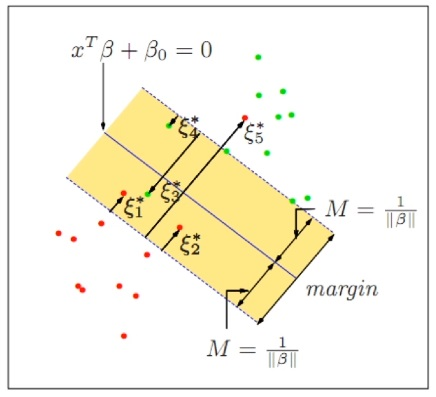

## SVM의 계산
- margin을 최대화한다는 것은 $\beta$의 절대값을 최소화한다는 것과 같다.
- $min_{(\beta,\beta_0)}\frac{1}{2}||\beta||^2+C\sum_{i=1}^{N}\xi_i$의 Lagrange function
  - $L_P=\frac{1}{2}||\beta||^2+C\sum_{i=1}^{N}\xi_i-\sum_{i=1}^{N}a_i[y_i(x_i^T\beta+\beta_o)-(1-\xi_i)]-\sum_{i=1}^{N}\mu_i\xi_i$
  - 위의 식을 최소화하는 각 $\beta,\beta_0,\xi_i$를 찾는 것
  - 이를 위해 Lagrange multipliers $a_i,\mu_i$를 도입
  
  
- $\beta,\beta_0,\xi_i$에 대하여 미분하여 해를 구하게 되면
  - $\beta=\sum_{i=1}^{N}a_iy_ix_i$
  - $0=\sum_{i=1}^{N}a_iy_i$
  - $a_i=C-\mu_i$

- 구한 해를 대입하여 새롭게 식을 정리하면
  - $L_D=\sum_{i=1}^{N}a_i-\frac{1}{2}\sum_{i=1}^{N}\sum_{i'=1}^{N}a_ia_i'y_iy_i'x_i^Tx_i'$
- 위의 식을 최소화시키는 $\hat{a}_i$를 알고리즘을 통하여 구할 수 있고, 이를 대입하여 평면을 구함
  - $\hat{\beta}=\sum_{i=1}^{N}\hat{a}_iy_ix_i$
- Karush-Kuhn-Tucker conditions를 만족한다 가정함

- **Karush-Kuhn-Tucker conditions**
  - $a_i[y_i(x_i^T\beta+\beta_o)-(1-\xi_i)]=0$
  - $\mu_i\xi_i=0$
  - $y_i(x_i^T\beta+\beta_o)-(1-\xi_i) \geq 0$
- 위의 식을 만족할 경우, $L_D$식을 최소화하는 $a_i$가 좋은 성질을 가지게 됨
  - Global minimum이 보장됨(구한 극소값이 다항식이어도 항상 최소값을 가지게 됨)

- KKT의 이해
  - $y_i(x_i^T\beta+\beta_o)-(1-\xi_i) \geq 0$ : margin 바깥에 점이 위치한 경우
  - $a_i[y_i(x_i^T\beta+\beta_o)-(1-\xi_i)]=0$
    - $a_i$는 margin 끝에 정확히 점이 위치할 때만 0이 아닌 값을 가질 수 있음
    - 이 $a_i$들을 support vector라 함
      - $\hat{\beta}=\sum_{i=1}^{N}\hat{a}_iy_ix_i$ 수식에서 **support vector로 인해 0인 값을 가지는 i가 생기기에 보정 역할을 함**

## SVM 심화 - 선형관계가 아닐 경우(SVN with kernel)
- https://www.youtube.com/watch?v=3liCbRZPrZA
  - 2차원 공간을 3차원으로 변형 : 컵 모양으로 만든 다음 초평면을 만들어 구분하는 절차(아 영상 보셈 그냥)

- Kernel을 활용한 SVM
  - SVM과 유사한 방식으로 동작하나, 추정향은 아래와 같이 변화함
  - $\hat{f}(x)=x\hat{\beta}+\hat{\beta}_0=x(\sum_{i=1}^{N}\hat{a}_iy_ix_i)+\hat{\beta}_0$
    - 위의 공식을 Kernel형태로 변환 : $\hat{f}(x)=\sum_{i=1}^{N}\hat{a}_iy_iK(x,x_i)+\hat{\beta}_0$
  - **$x$와 $\hat{\beta}$의 선형관계를 깨고 $K(x,x_i)$를 도입**

- Kernel 선택
  - d차원 polynomial : $K(x,x_i)=(1+<x,x'>)^d$
    - d를 올림에 따라 모형의 복잡도를 올릴 수 있음
    - $<x,x'>$ : 내적
  - Gaussian Kernel = Radial basis : $exp(-\gamma||x-x'||^2)$

- 비선형 구조의 데이터를 fitting할 때, Kernel을 사용할 필요가 있음. 그러나 차원이 높아진다면
  - **추정해야 하는 모수의 개수가 많아짐에 따라 Test error가 높아진다**
  
  
- SVM과 LDA의 비교
  - **SVM의 상대적 장점**
    - 데이터의 분포가정이 힘든 경우, covariance 구조를 고려하는 것은 비효율적임
    - Boudnary 근처의 관측치만을 고려할 수 있음
    - 예측의 정확도가 높음
  - **SVM의 상대적 단점**
    - C를 결정해야 함
    - 모형 구축에 시간이 오래 걸림

## One-class SVM(응용편)
- **종속변수 정보가 없는 자료를 요약하는 데 One-class SVM를 사용**(classifier가 하나인 경우)
  - Clustring과 비슷한 느낌으로 접근
  
  
- 자료를 모두 포함하는 원을 활용
  - 중심위치가 a라 할 때, 아래의 식을 최소화 하는 원의 반지음을 찾음
    - $||x-a||^2 \leq R^2$일 때, 최소값$min_{(R,a)}R^2$를 찾는 것

- 에러를 포함시키는 경우로 확장
  - $||x-a||^2 \leq R^2$일 때, $min_{(R,a)}(R^2+C\sum_{i}\xi_i)$ 조건 찾기
    - 전제조건 : $\xi_i\geq 0$
  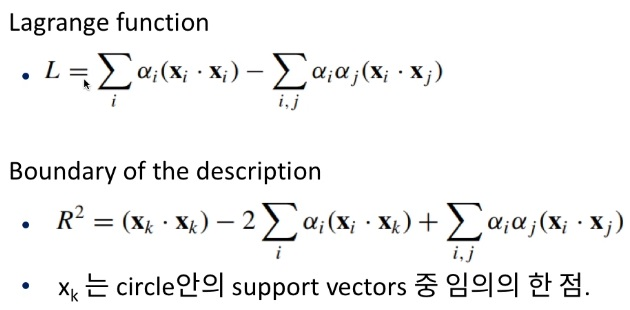

- 결과(바나나 모양일 때 사용하면 좋음)
  - 점선 : Boundary of the description
  - 노란 십자 : 자료
  - 노란색 원 : support vector
  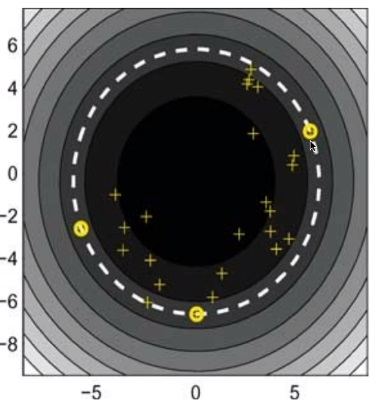

- 내적을 Kernel로 바꾼 경우의 결과(Gaussian Kernel = Radial basis)
  - $K(x_i,x_j)=exp(-||x_i-x_j||^2/s^2)$
  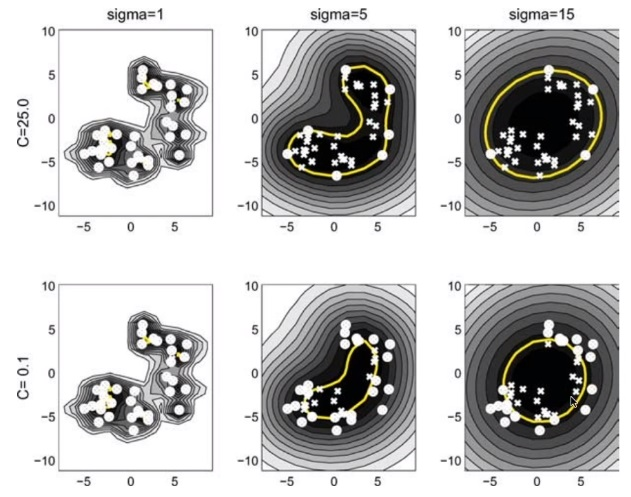

## Support Vector Regression(응용편2)
- 범주형이 아니라 연속형이라면? 아래와 같은 평면을 정의함
  - $f(x)=x^T\beta+\beta_0=0$
    - $\beta$와 $\beta_0$을 유일하게 만들기 위해서 $||\beta||=1$ 조건이 필요함
    
    
- 아래 함수를 최소화하는 것을 고려
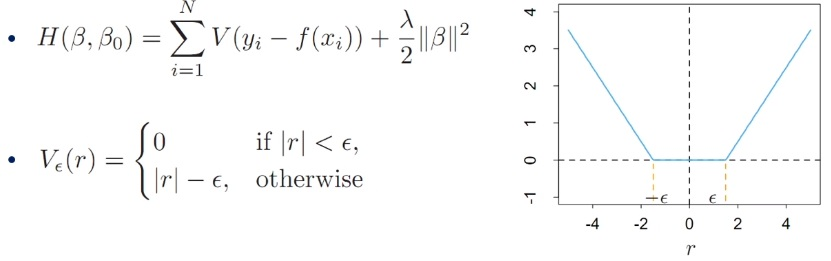

- 여기서 계산상의 편의를 위해 아래 cost fuction을 사용함
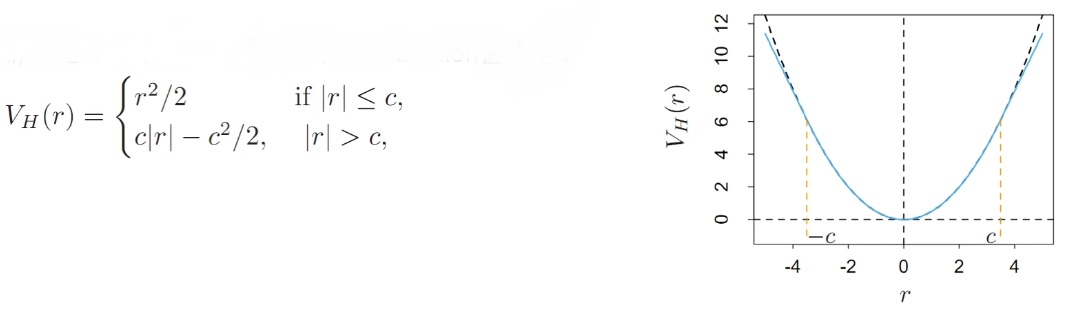

- 이를 통해 찾아낸 평면
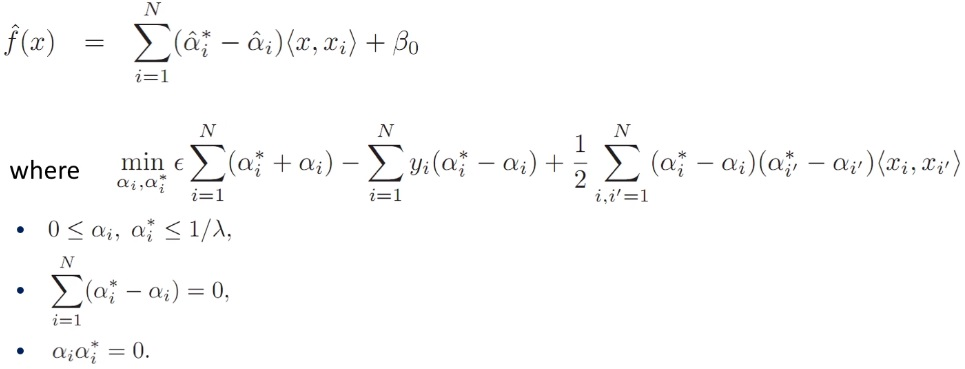

- SVM과 마찬가지로 내적에 대하여 Kernel을 적용하면
  - $\hat{f}x=\sum_{i=1}^{N}\hat{a}_iK(x,x_i)$
  
  
- Kernels
  - **RBF** : $K(x_i,x_j)=exp(-||x_i-x_j||^2/s^2)$
  - **Polynomial** : $K(x_i,x_j)=(x_i,x_j)^2$
  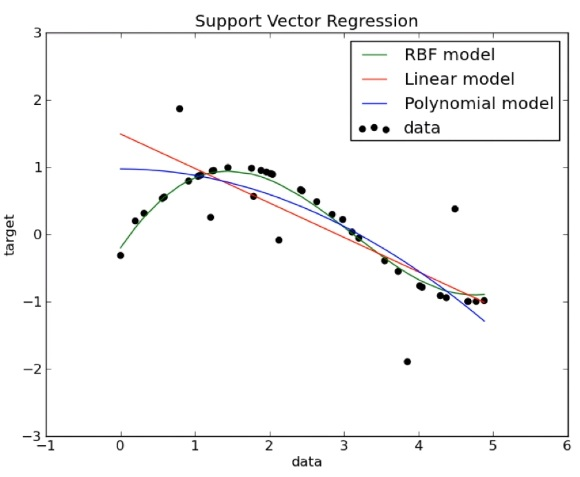

## Wa! 실습
## 1. 데이터 불러오기, SVM 적합

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- 함수 불러오기

In [2]:
from sklearn import svm,datasets

- 모델 적합

In [5]:
iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target

C=1
clf=svm.SVC(kernel='linear',C=C) #커널을 주지 않겠다. C=1(내적으로 주겠다)
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [8]:
from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

## 2. kernel SVM 적합 및 비교

- LinearSVC

In [9]:
clf=svm.LinearSVC(C=C,max_iter=10000)
clf.fit(X,y)
y_pred=clf.predict(X)
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]], dtype=int64)

- 단순 Linear를 사용했을때하고 결과가 꽤 상당히 차이난다.

- radial basis function

In [12]:
clf=svm.SVC(kernel='rbf',gamma=0.7,C=C,max_iter=10000)
clf.fit(X,y)
y_pred=clf.predict(X)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]], dtype=int64)

- polynomial kernel

In [15]:
clf=svm.SVC(kernel='poly',degree=3,C=C,gamma='auto')
#피팅이 되지 않는다면 max_iter값을 변경해주면 된다
clf.fit(X,y)
y_pred=clf.predict(X)
confusion_matrix(y,y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 16, 34]], dtype=int64)

- 시각적 비교

- 함수 정의

In [16]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

- 데이터 불러오기

In [17]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

- 모델정의 및 피팅

In [18]:
C = 1.0 #Regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [19]:
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

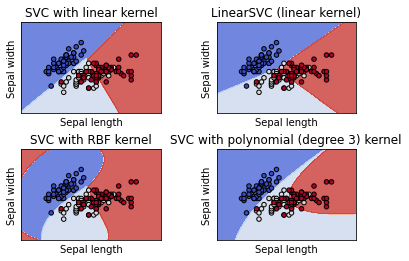

In [20]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

- LinearSVC는 squared hinge loss를 최소화한 것이고, 단순 SVC는 regular hinge loss를 최소화한 것이기게 결과에 차이가 난 것임
- LinearSVC는 One-vs-All multiclass reduction을 사용한 반면 단순 SVC는 One-vs-One multiclass reduction을 사용하였기에 차이가 남